In [9]:
# Import the dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
from config import weather_api_key

# Import the time library and the datetime module from the datetime library
import time

from datetime import datetime

# Create base URL for Mod 6.2.6 activity. note: work begins after the citypy section
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [10]:
# Creat a set of random latitudes and longitudes combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)

lat_lngs = zip(lats, lngs)

lat_lngs

In [11]:
# Add the latitudes and longitudes to a list
coordinates = list(lat_lngs)

In [12]:
# Use the print() function to display the latitude and longitude combinations
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

8.439746189180468 -178.5232846040957
64.88105040659457 78.99781880518117
-33.951088439546304 -9.595875179170719
-88.5714558422694 -112.95806459370164
56.05492099950291 1.726726455770006
-26.72125921941045 168.85207496228003
-33.983383577759305 -118.87633120386502
-41.14849626672792 52.3808340229684
-84.35595954685118 28.769692159828082
-20.039739340078526 32.698266608152295
-56.3303001601977 94.49257238974548
26.07786895297788 173.98525753220923
59.21357930631666 63.772155468779914
19.11780848515083 1.4924559977993397
-73.52327492525362 48.06954851389531
-46.66804916213648 -125.50885875622205
84.11864623190309 147.7360072470497
-68.82854616697168 24.698965926250565
0.9964930611980947 -177.4365904374532
76.71854281867331 -57.15801410282498
39.733989326584606 48.75400584896545
53.67353980040201 -56.62566444064504
-33.41507604318727 163.09620652977776
26.8528220548601 53.62185416070648
83.40251466363054 -108.70879881643366
71.64167691941643 -50.7318313997861
-48.083469547685986 59.0769107

In [13]:
from citipy import citipy

In [14]:
# Create a list for holding the cities
cities = []

# Identify the nearest city for each latitude and longitude combination
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count
len(cities)

630

In [15]:
# Create an empty list to hold the weather dat
city_data = []

# Print the beginning of the logging.

print("Beginning Data Retrieval     ")

print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list

for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)
        
    # Create endpoint URL with each city
    city_url = url + "&q=" + city.replace(" ","+")
    
    # Log the URL, record and set numbers and the city
    print(f"Prosessing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record count
    record_count += 1
    
# Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        
        # Parse out the needed data
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass
    
# Indicate that Data Loading is complete.
print("-----------------------------")

print("Data Retrieval Complete      ")

print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Prosessing Record 1 of Set 1 | vaitupu
City not found. Skipping...
Prosessing Record 2 of Set 1 | tarko-sale
Prosessing Record 3 of Set 1 | jamestown
Prosessing Record 4 of Set 1 | punta arenas
Prosessing Record 5 of Set 1 | bridlington
Prosessing Record 6 of Set 1 | vao
Prosessing Record 7 of Set 1 | rikitea
Prosessing Record 8 of Set 1 | taolanaro
City not found. Skipping...
Prosessing Record 9 of Set 1 | kruisfontein
Prosessing Record 10 of Set 1 | chipinge
Prosessing Record 11 of Set 1 | busselton
Prosessing Record 12 of Set 1 | butaritari
Prosessing Record 13 of Set 1 | tabory
Prosessing Record 14 of Set 1 | kidal
Prosessing Record 15 of Set 1 | port alfred
Prosessing Record 16 of Set 1 | chokurdakh
Prosessing Record 17 of Set 1 | bredasdorp
Prosessing Record 18 of Set 1 | upernavik
Prosessing Record 19 of Set 1 | qaracala
Prosessing Record 20 of Set 1 | saint anthony
Prosessing Record 21 of Set 1 | ahipara
Prosessing Rec

Prosessing Record 38 of Set 4 | ancud
Prosessing Record 39 of Set 4 | vagur
Prosessing Record 40 of Set 4 | vila
Prosessing Record 41 of Set 4 | metro
Prosessing Record 42 of Set 4 | srednekolymsk
Prosessing Record 43 of Set 4 | spas-demensk
Prosessing Record 44 of Set 4 | churumuco
City not found. Skipping...
Prosessing Record 45 of Set 4 | bilma
Prosessing Record 46 of Set 4 | lolua
City not found. Skipping...
Prosessing Record 47 of Set 4 | okhotsk
Prosessing Record 48 of Set 4 | uvira
Prosessing Record 49 of Set 4 | sentyabrskiy
City not found. Skipping...
Prosessing Record 50 of Set 4 | bambous virieux
Prosessing Record 1 of Set 5 | kollo
Prosessing Record 2 of Set 5 | dabat
Prosessing Record 3 of Set 5 | saint george
Prosessing Record 4 of Set 5 | cidreira
Prosessing Record 5 of Set 5 | kamina
Prosessing Record 6 of Set 5 | gizo
Prosessing Record 7 of Set 5 | cayenne
Prosessing Record 8 of Set 5 | gorizia
Prosessing Record 9 of Set 5 | beringovskiy
Prosessing Record 10 of Set 5 |

Prosessing Record 29 of Set 8 | baykit
Prosessing Record 30 of Set 8 | meadow lake
Prosessing Record 31 of Set 8 | cervo
Prosessing Record 32 of Set 8 | hoa binh
Prosessing Record 33 of Set 8 | urucui
Prosessing Record 34 of Set 8 | mahadday weyne
City not found. Skipping...
Prosessing Record 35 of Set 8 | sistranda
Prosessing Record 36 of Set 8 | gat
Prosessing Record 37 of Set 8 | darhan
Prosessing Record 38 of Set 8 | alice springs
Prosessing Record 39 of Set 8 | terrak
Prosessing Record 40 of Set 8 | marcona
City not found. Skipping...
Prosessing Record 41 of Set 8 | lufilufi
Prosessing Record 42 of Set 8 | obera
Prosessing Record 43 of Set 8 | misratah
Prosessing Record 44 of Set 8 | oussouye
Prosessing Record 45 of Set 8 | waingapu
Prosessing Record 46 of Set 8 | beloha
Prosessing Record 47 of Set 8 | staunton
Prosessing Record 48 of Set 8 | moussoro
Prosessing Record 49 of Set 8 | chuy
Prosessing Record 50 of Set 8 | alofi
Prosessing Record 1 of Set 9 | mayo
Prosessing Record 2 

Prosessing Record 21 of Set 12 | aykhal
Prosessing Record 22 of Set 12 | henties bay
Prosessing Record 23 of Set 12 | axim
Prosessing Record 24 of Set 12 | sabha
Prosessing Record 25 of Set 12 | limulunga
Prosessing Record 26 of Set 12 | utiroa
City not found. Skipping...
Prosessing Record 27 of Set 12 | chabahar
Prosessing Record 28 of Set 12 | ola
Prosessing Record 29 of Set 12 | faya
Prosessing Record 30 of Set 12 | kinel-cherkassy
Prosessing Record 31 of Set 12 | batemans bay
Prosessing Record 32 of Set 12 | sofiysk
City not found. Skipping...
Prosessing Record 33 of Set 12 | la uribe
City not found. Skipping...
Prosessing Record 34 of Set 12 | parrita
Prosessing Record 35 of Set 12 | naberera
Prosessing Record 36 of Set 12 | sioux lookout
Prosessing Record 37 of Set 12 | tommot
Prosessing Record 38 of Set 12 | cape elizabeth
City not found. Skipping...
Prosessing Record 39 of Set 12 | kargasok
Prosessing Record 40 of Set 12 | fukagawa
Prosessing Record 41 of Set 12 | port-gentil
P

In [16]:
len(city_data)

584

In [17]:
# Convert the array of dictionaries to a Pandas DataFrame

city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Tarko-Sale,64.9225,77.7850,32.99,88,93,11.63,RU,2022-10-15 16:54:14
1,Jamestown,42.0970,-79.2353,55.04,58,100,19.57,US,2022-10-15 16:54:14
2,Punta Arenas,-53.1500,-70.9167,51.91,37,0,18.41,CL,2022-10-15 16:54:15
3,Bridlington,54.0831,-0.1919,53.89,68,41,23.89,GB,2022-10-15 16:54:15
4,Vao,-22.6667,167.4833,67.91,62,2,8.12,NC,2022-10-15 16:54:15
5,Rikitea,-23.1203,-134.9692,73.09,81,17,15.73,PF,2022-10-15 16:54:16
6,Kruisfontein,-34.0033,24.7314,61.88,86,100,14.79,ZA,2022-10-15 16:54:16
7,Chipinge,-20.1883,32.6236,74.25,49,1,12.21,ZW,2022-10-15 16:54:17
8,Busselton,-33.6500,115.3333,48.15,86,94,7.65,AU,2022-10-15 16:54:17
9,Butaritari,3.0707,172.7902,80.94,74,69,19.86,KI,2022-10-15 16:54:17


In [18]:
new_col_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_col_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Tarko-Sale,RU,2022-10-15 16:54:14,64.9225,77.7850,32.99,88,93,11.63
1,Jamestown,US,2022-10-15 16:54:14,42.0970,-79.2353,55.04,58,100,19.57
2,Punta Arenas,CL,2022-10-15 16:54:15,-53.1500,-70.9167,51.91,37,0,18.41
3,Bridlington,GB,2022-10-15 16:54:15,54.0831,-0.1919,53.89,68,41,23.89
4,Vao,NC,2022-10-15 16:54:15,-22.6667,167.4833,67.91,62,2,8.12
5,Rikitea,PF,2022-10-15 16:54:16,-23.1203,-134.9692,73.09,81,17,15.73
6,Kruisfontein,ZA,2022-10-15 16:54:16,-34.0033,24.7314,61.88,86,100,14.79
7,Chipinge,ZW,2022-10-15 16:54:17,-20.1883,32.6236,74.25,49,1,12.21
8,Busselton,AU,2022-10-15 16:54:17,-33.6500,115.3333,48.15,86,94,7.65
9,Butaritari,KI,2022-10-15 16:54:17,3.0707,172.7902,80.94,74,69,19.86


In [19]:
# Create the output file (CSV)
output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [20]:
# Extract relevant fields from the DataFrame for plotting
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed =  city_data_df["Wind Speed"]

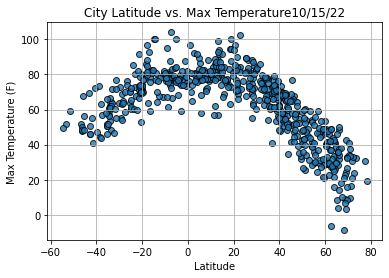

In [21]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature
plt.scatter(lats,
           max_temps,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature"+time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig1.png")

# Show plot
plt.show()

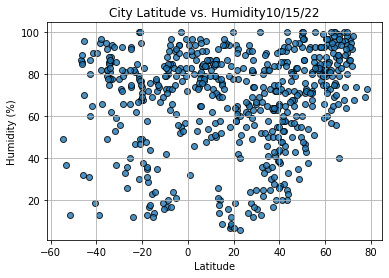

In [22]:
# Build the scatter plot for latitude vs. humidity
plt.scatter(lats,
           humidity,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity"+time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig2.png")

# Show plot
plt.show()

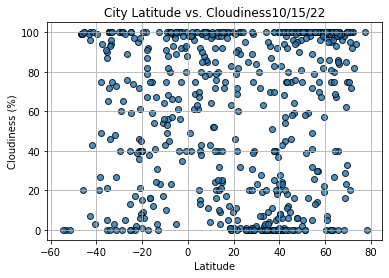

In [23]:
# Build the scatter plot for latitude vs. cloudiness
plt.scatter(lats,
           cloudiness,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness"+time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig3.png")

# Show plot
plt.show()

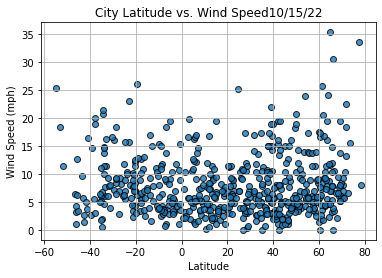

In [24]:
# Build the scatter plot for latitude vs. wind speed
plt.scatter(lats,
           wind_speed,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed"+time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig4.png")

# Show plot
plt.show()

In [45]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data

def plot_linear_regression(x_axis, y_values, title, y_label, text_coordinates):
    
    #Run regression on hemisphere weather data
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept
    regress_values = x_values * slope + intercept
    
    # Get the equation of the line
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept, 2))
    
    # Create a scatter plot and plot the regression line
    plt.scatter(x_values, y_values)
    plt.plot(x_values,regress_values,"r")
    
    # Annotate the text for the line equation
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    
    plt.show()
    

In [32]:
index13 = city_data_df.loc[13]
index13

City                   Chokurdakh
Country                        RU
Date          2022-10-15 16:54:19
Lat                       70.6333
Lng                      147.9167
Max Temp                      9.3
Humidity                       97
Cloudiness                     95
Wind Speed                   7.99
Name: 13, dtype: object

In [30]:
city_data_df["Lat"] >= 0

0       True
1       True
2      False
3       True
4      False
       ...  
579     True
580     True
581     True
582     True
583     True
Name: Lat, Length: 584, dtype: bool

In [33]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Tarko-Sale,RU,2022-10-15 16:54:14,64.9225,77.7850,32.99,88,93,11.63
1,Jamestown,US,2022-10-15 16:54:14,42.0970,-79.2353,55.04,58,100,19.57
3,Bridlington,GB,2022-10-15 16:54:15,54.0831,-0.1919,53.89,68,41,23.89
9,Butaritari,KI,2022-10-15 16:54:17,3.0707,172.7902,80.94,74,69,19.86
10,Tabory,RU,2022-10-15 16:54:18,58.5198,64.5495,45.25,82,99,3.24


In [34]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

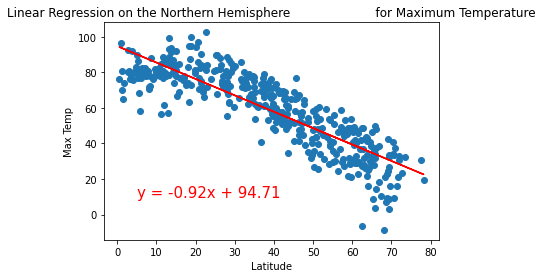

In [53]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Call the function
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Northern Hemisphere\
                      for Maximum Temperature', 'Max Temp', (5,10))

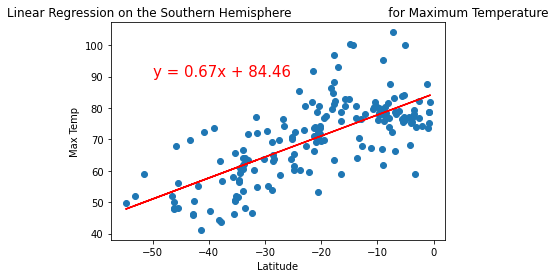

In [49]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

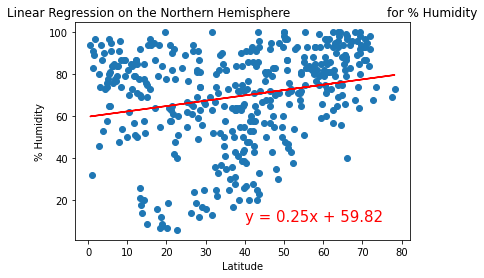

In [54]:
# Linear regression on the Northern Hemisphere - Humidity
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

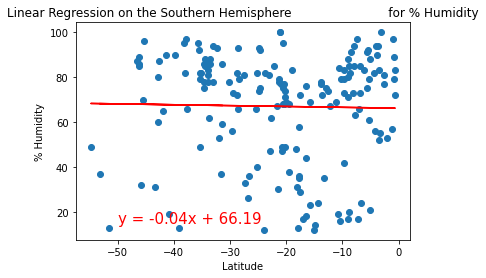

In [55]:
# Linear regression on the Southern Hemisphere - Humidity
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

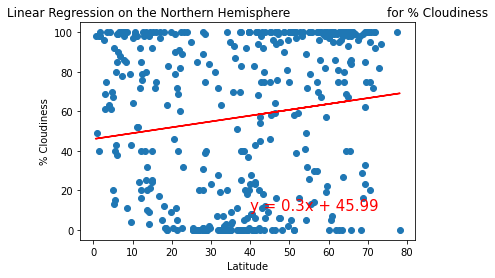

In [59]:
# Linear regression on the Northern Hemisphere - Cloudiness
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,10))

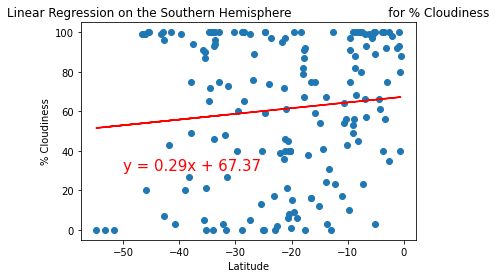

In [62]:
# Linear regression on the Southern Hemisphere - Cloudiness
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,30))

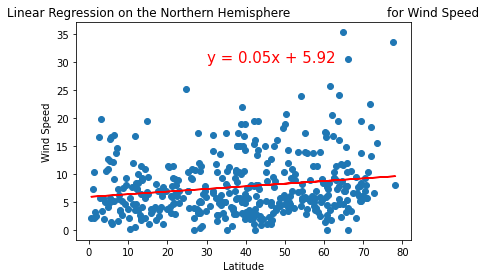

In [65]:
# Linear regression on the Northern Hemisphere - Wind Speed
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(30,30))

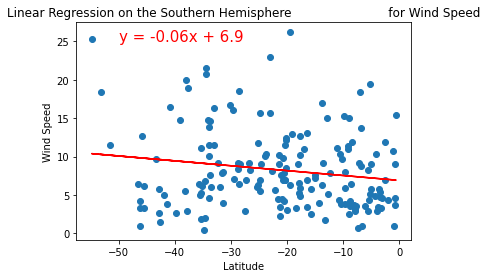

In [68]:
# Linear regression on the Southern Hemisphere - Wind Speed
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,25))